In [1]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
from sklearn.neighbors import NearestNeighbors
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\envs\requests\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\envs\requests\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\envs\requests\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\envs\requests\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


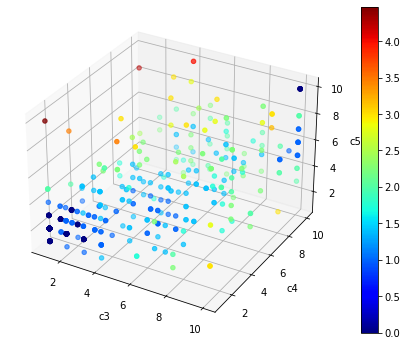

,c3,c4,c5
0,1,1,2
1,4,5,7
2,1,1,2
3,8,1,3
4,1,3,2


In [15]:
data = pd.read_csv("breast-cancer-wisconsin.data",decimal=',',names=['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9','c10'])
data=pd.DataFrame(data)
data=np.array(data)
index=np.where(data=='?')[0]
data=np.delete(data,index,axis=0)
data=pd.DataFrame(data)
data.columns=['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9','c10']
data=data.drop(['c0','c1','c2','c6','c7','c8','c9','c10'],axis=1)


k=8
nbrs=NearestNeighbors(n_neighbors=k,metric=distance.euclidean).fit(data.values)
distances,indices=nbrs.kneighbors(data.values)

anomaly_score = distances[:,k-1]
fig = plt.figure(figsize=(10,6))
ax=fig.add_subplot(111,projection='3d')
p=ax.scatter(data.iloc[:,0],data.iloc[:,1],data.iloc[:,2],c=anomaly_score,cmap='jet')
ax.set_xlabel('c3')
ax.set_ylabel('c4')
ax.set_zlabel('c5')
fig.colorbar(p)
plt.show()
data.head()